ibmqfactory.load_account:WARNING:2023-10-06 19:16:15,305: Credentials are already in use. The existing account in the session will be replaced.


9
7
True 010001100
{   'assignment': '010001100',
    'circuit_results': [   {   '000001100': 0.00025,
                               '000111000': 0.00025,
                               '001000100': 0.00025,
                               '001010100': 0.164,
                               '001011111': 0.00025,
                               '001100010': 0.16775,
                               '010001100': 0.169,
                               '010010011': 0.00025,
                               '010100001': 0.1665,
                               '011100010': 0.00025,
                               '011100101': 0.00025,
                               '011111010': 0.00025,
                               '100001010': 0.16275,
                               '100010001': 0.167,
                               '101110110': 0.00025,
                               '110011100': 0.00025,
                               '111000000': 0.00025,
                               '111111001': 0.00025}],
 

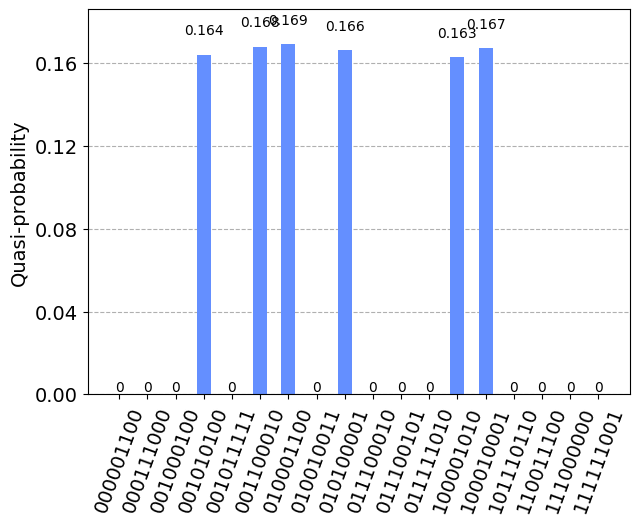

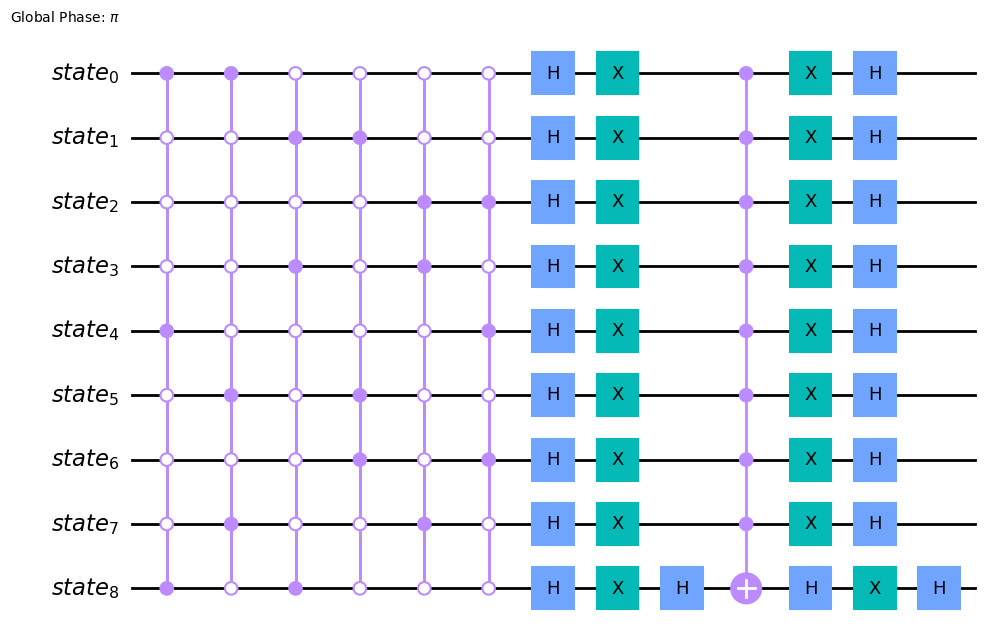

In [3]:
from qiskit_algorithms import AmplificationProblem, Grover
from qiskit.circuit.library import PhaseOracle
from qiskit.primitives import BackendSampler
from qiskit.tools.visualization import plot_histogram
from qiskit_ibm_runtime import Sampler, Options
from qiskit import IBMQ

IBMQ.load_account()

oracle = PhaseOracle.from_dimacs_file('data/graphE.cnf')
problem = AmplificationProblem(oracle)
sampler = Sampler(backend='ibmq_qasm_simulator')
print(oracle.num_qubits)
iterations = Grover.optimal_num_iterations(num_solutions=6, num_qubits=oracle.num_qubits) 
print(iterations)
grover = Grover(iterations=iterations, sampler=sampler)
result = grover.amplify(problem)

print(result.oracle_evaluation, result.top_measurement)
print(result)
display(plot_histogram(result.circuit_results[0]))
problem.grover_operator.decompose().draw(output='mpl')

